<a href="https://colab.research.google.com/github/romenlongcode/YT-PYtorch/blob/main/irisclassier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn  as nn
import torch.nn.functional as F
import pandas as pd

In [8]:
#neural network definition
class Model(nn.Module):
  #input (4 features off a flower)->>
  #hidden layer1 H1(number of neurons)->>
  #hidden layer2 H2(N)->>
  #OUTPUT(3 Classes of iris)

  def __init__(self,in_features=4,h1=8,h2=9,output_features=3):
    super().__init__() #instantiate our nn.Module)
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,output_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

In [9]:
#pick a manual seed for randomization
torch.manual_seed(41)
model=Model()

In [11]:
#lloading dataset
url= "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df=pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


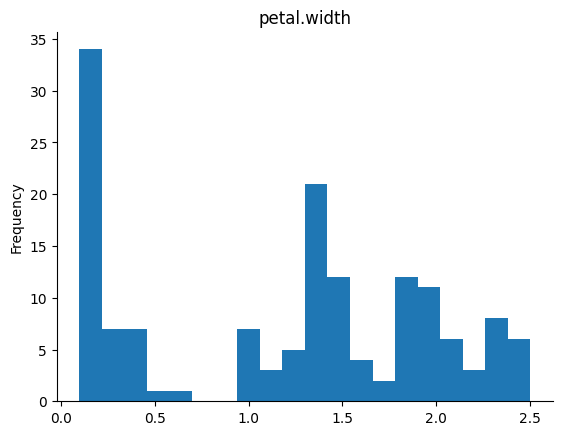

In [15]:
# @title petal.width

from matplotlib import pyplot as plt
my_df['petal.width'].plot(kind='hist', bins=20, title='petal.width')
plt.gca().spines[['top', 'right',]].set_visible(False)

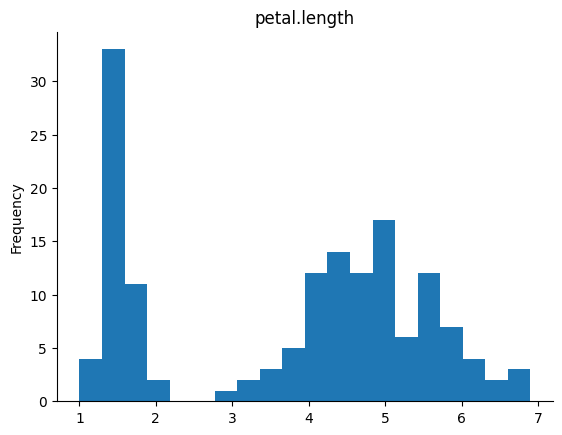

In [14]:
# @title petal.length

from matplotlib import pyplot as plt
my_df['petal.length'].plot(kind='hist', bins=20, title='petal.length')
plt.gca().spines[['top', 'right',]].set_visible(False)

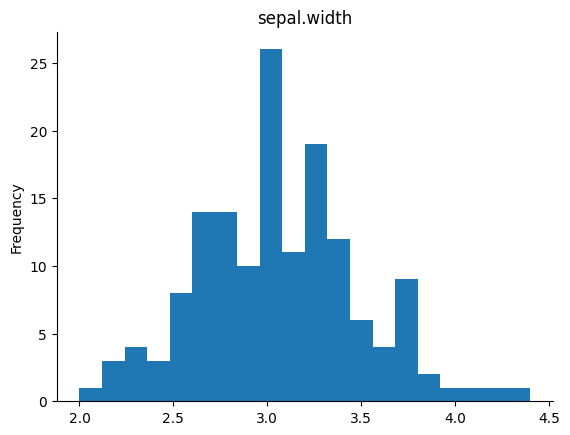

In [13]:
# @title sepal.width

from matplotlib import pyplot as plt
my_df['sepal.width'].plot(kind='hist', bins=20, title='sepal.width')
plt.gca().spines[['top', 'right',]].set_visible(False)

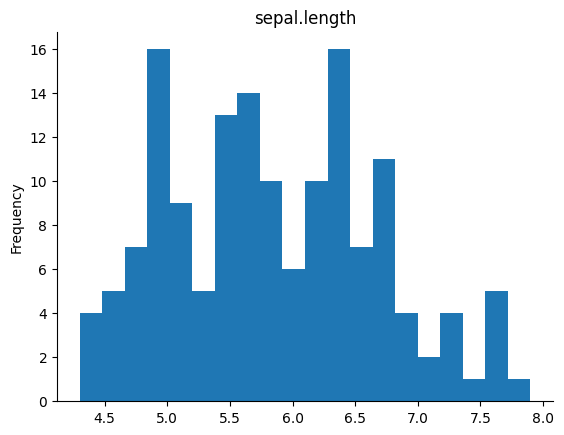

In [12]:
# @title sepal.length

from matplotlib import pyplot as plt
my_df['sepal.length'].plot(kind='hist', bins=20, title='sepal.length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [19]:
#Change last column from Strings to integers as the machine does not accept alphabets to strings but only number floats

my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)

In [20]:
my_df.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [21]:
my_df.tail(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
130,7.4,2.8,6.1,1.9,2.0
131,7.9,3.8,6.4,2.0,2.0
132,6.4,2.8,5.6,2.2,2.0
133,6.3,2.8,5.1,1.5,2.0
134,6.1,2.6,5.6,1.4,2.0
135,7.7,3.0,6.1,2.3,2.0
136,6.3,3.4,5.6,2.4,2.0
137,6.4,3.1,5.5,1.8,2.0
138,6.0,3.0,4.8,1.8,2.0
139,6.9,3.1,5.4,2.1,2.0


In [23]:
#define X,y
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#convert X_features into float tensors
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)

In [ ]:
#convert y_labels into long tensors